# SUMMER ANALYTICS 2023

## WEEK-4 ASSIGNMENT

In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Let's explore the dataset shall we?**

[The Car Evaluation Database](https://drive.google.com/file/d/1ck5JUuRP0MY_k1hFwqx5Uc8iQJwqHkYJ/view?usp=sharing) contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [134]:
# Read the csv file as data
df = pd.read_csv("car_evaluation.csv",header=None)
# you may print first few rows
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [135]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [136]:
# view dimensions of dataset
df.shape

(1728, 7)

We can see that there are 1727 instances and 7 variables in the data set.



**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [137]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [138]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [139]:
# check missing values in variables
#write your code here
df.isnull().sum()
# no null values in the data

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Declare feature vector and target variable**

In [140]:
X = df.drop(['class'], axis=1)

y = df['class']

**Split data into separate training and test set**

In [141]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [142]:
# check the shape of X_train and X_test
X_train.shape

(1157, 6)

In [143]:
X_test.shape

(571, 6)

Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [144]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables
Now, I will encode the categorical variables.

In [145]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all the variables are ordinal categorical data type.



In [146]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [147]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [149]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

 Let's see how a basic Logistic Regressor works on this!

In [150]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[ 21   0 101   7]
 [  3   0  17   0]
 [ 37   0 359   1]
 [ 12   0  12   1]]
Accuracy for Logistic Regression : 0.66725 



**Now it's your turn. Train the following:**

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values

In [151]:
# AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=1000,random_state=0)

score(ab,"AdaBoostClassifier")

[[ 54   9  57   9]
 [ 11   6   0   3]
 [ 24   0 373   0]
 [  0   0   0  25]]
Accuracy for AdaBoostClassifier : 0.8021 



In [152]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rf,"RandomForestClassifier")

[[118   6   4   1]
 [  3  16   0   1]
 [  2   0 395   0]
 [  3   0   0  22]]
Accuracy for RandomForestClassifier : 0.96497 



AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [153]:
# Naive Bayes: GaussianNB
nb = GaussianNB()
score(nb,"GaussianNB")

[[ 11   0  54  64]
 [  4   0   7   9]
 [  8   0 334  55]
 [  0   0   0  25]]
Accuracy for GaussianNB : 0.64799 



In [154]:
# KNN: KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
score(knn,"KNN")

[[103   2  23   1]
 [ 11   9   0   0]
 [  3   0 394   0]
 [  5   0   6  14]]
Accuracy for KNN : 0.91068 



In [155]:
# Decission trees: DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion="log_loss",max_depth=30,random_state=0)
score(dt,"DecisionTreeClassifier")
# this achieved accuracy of 97% which is greater than that of random forest

[[118   9   2   0]
 [  0  20   0   0]
 [  2   0 395   0]
 [  3   0   0  22]]
Accuracy for DecisionTreeClassifier : 0.97198 



Visualize decision-trees

[Text(0.5343237704918032, 0.9666666666666667, 'x[3] <= 0.5\nlog_loss = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.5179303278688525, 0.9, 'log_loss = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5507172131147541, 0.9, 'x[5] <= 0.5\nlog_loss = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.29661885245901637, 0.8333333333333334, 'x[1] <= 2.5\nlog_loss = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.16700819672131148, 0.7666666666666667, 'x[0] <= 0.5\nlog_loss = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.04918032786885246, 0.7, 'x[2] <= 0.5\nlog_loss = 0.232\nsamples = 53\nvalue = [51, 0, 2, 0]'),
 Text(0.03278688524590164, 0.6333333333333333, 'x[4] <= 1.5\nlog_loss = 0.65\nsamples = 12\nvalue = [10, 0, 2, 0]'),
 Text(0.01639344262295082, 0.5666666666666667, 'log_loss = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(0.04918032786885246, 0.5666666666666667, 'x[3] <= 1.5\nlog_loss = 1.0\nsamples = 4\nvalue = [2, 0, 2, 0]'),


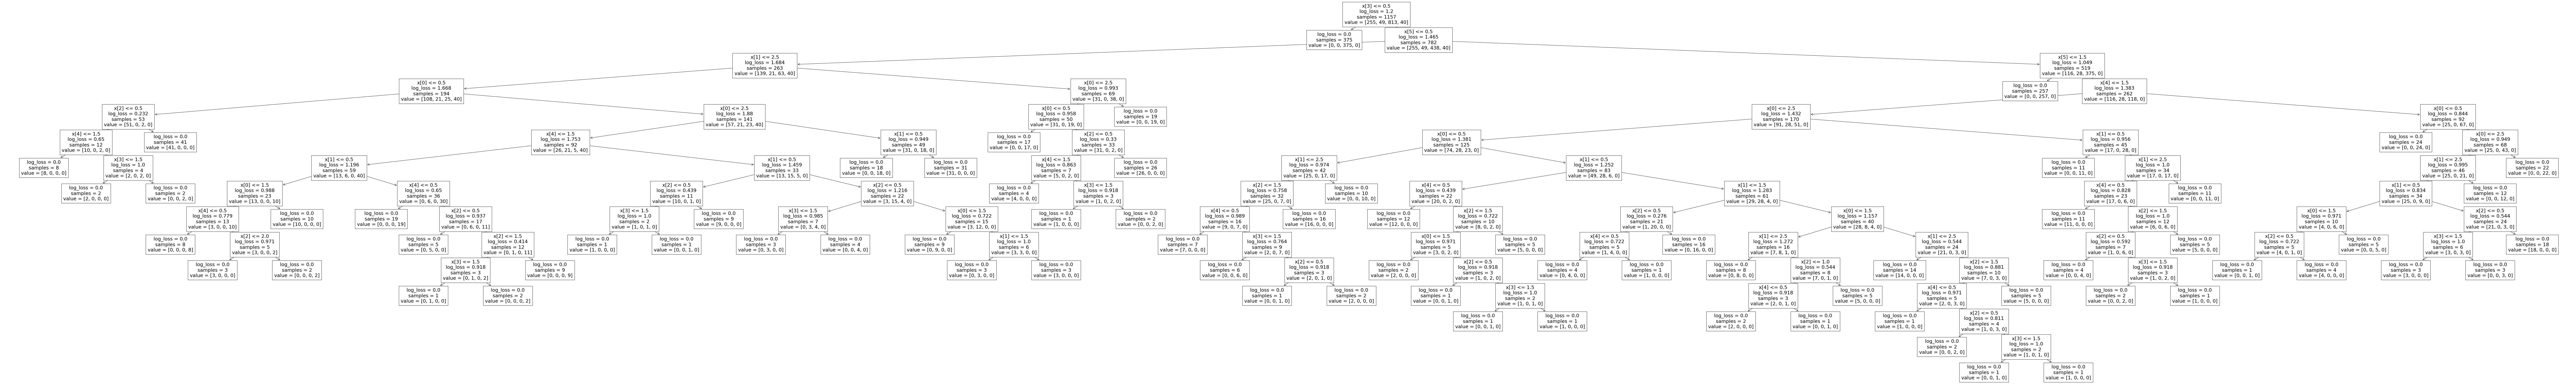

In [156]:
plt.figure(figsize=(200,30))

from sklearn import tree

tree.plot_tree(dt)

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

In [157]:
dt1 = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=0)
score(dt1,"Decision trees")

[[118   8   2   1]
 [  0  18   0   2]
 [  6   0 391   0]
 [  3   0   0  22]]
Accuracy for Decision trees : 0.96147 



[Text(0.5443948412698413, 0.9545454545454546, 'x[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.5285218253968254, 0.8636363636363636, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5602678571428571, 0.8636363636363636, 'x[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.30952380952380953, 0.7727272727272727, 'x[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.1746031746031746, 0.6818181818181818, 'x[0] <= 0.5\ngini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.047619047619047616, 0.5909090909090909, 'x[2] <= 0.5\ngini = 0.073\nsamples = 53\nvalue = [51, 0, 2, 0]'),
 Text(0.031746031746031744, 0.5, 'x[4] <= 1.5\ngini = 0.278\nsamples = 12\nvalue = [10, 0, 2, 0]'),
 Text(0.015873015873015872, 0.4090909090909091, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(0.047619047619047616, 0.4090909090909091, 'x[3] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2, 0]'),


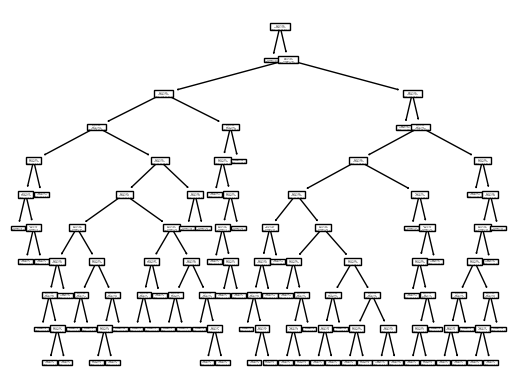

In [158]:
tree.plot_tree(dt1)

Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

In [159]:
dt2 = DecisionTreeClassifier(criterion="entropy",max_depth=8,random_state=0)
score(dt2,"Decision trees")

[[114   8   4   3]
 [  5  12   0   3]
 [  9   0 388   0]
 [  0   0   0  25]]
Accuracy for Decision trees : 0.94396 



[Text(0.5585106382978723, 0.9444444444444444, 'x[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.5372340425531915, 0.8333333333333334, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5797872340425532, 0.8333333333333334, 'x[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.34308510638297873, 0.7222222222222222, 'x[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.19680851063829788, 0.6111111111111112, 'x[0] <= 0.5\nentropy = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.06382978723404255, 0.5, 'x[2] <= 0.5\nentropy = 0.232\nsamples = 53\nvalue = [51, 0, 2, 0]'),
 Text(0.0425531914893617, 0.3888888888888889, 'x[4] <= 1.5\nentropy = 0.65\nsamples = 12\nvalue = [10, 0, 2, 0]'),
 Text(0.02127659574468085, 0.2777777777777778, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(0.06382978723404255, 0.2777777777777778, 'x[3] <= 1.5\nentropy = 1.0\nsamples = 4\nvalu

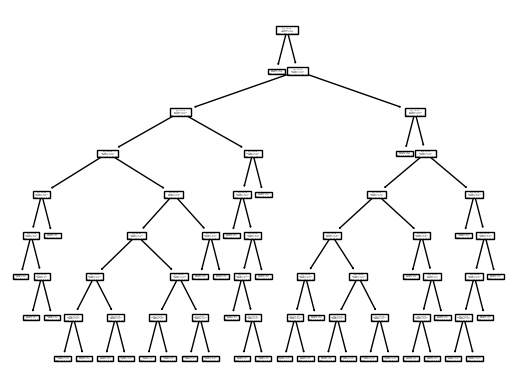

In [160]:
tree.plot_tree(dt2)

Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

In [164]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

#xgboost requires numerical output as well

In [165]:
# XGBClassifier
xg = XGBClassifier(n_estimators=1000, learning_rate=0.01)
score(xg,"XGBClassifier")

[[120   8   0   1]
 [  0  19   0   1]
 [  0   0 397   0]
 [  1   1   0  23]]
Accuracy for XGBClassifier : 0.97898 



Visualize XGBClassifier

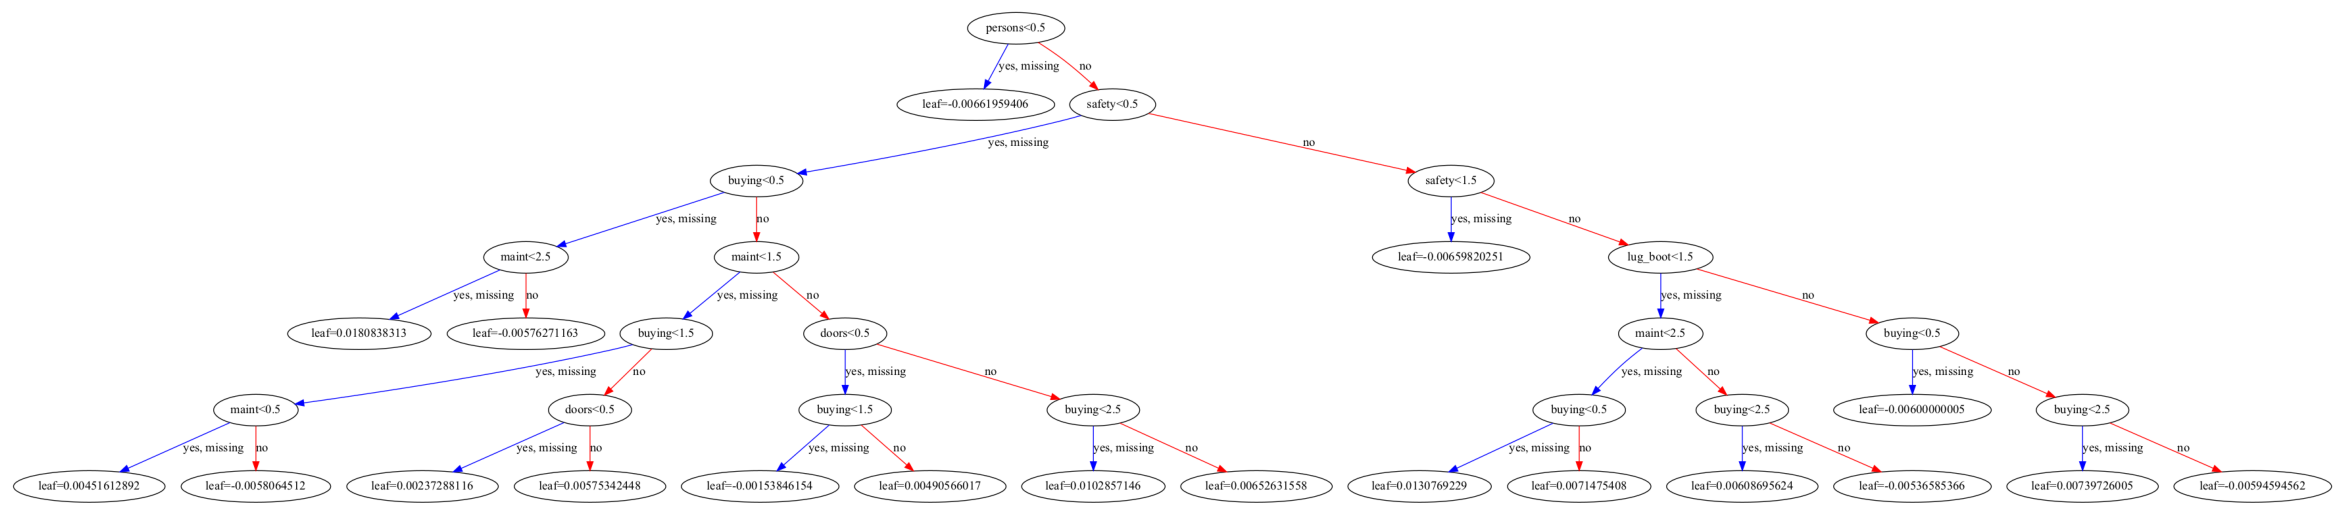

In [167]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
#change the model name
plot_tree(xg, ax=ax)
plt.show()

Now, heres a task for you. Try XGBRFClassifier on your own.

In [168]:
xgbrf = XGBRFClassifier( n_estimators=1000, learning_rate=0.1)
score(xgbrf,"XGBRFClassifier")

[[113   1  12   3]
 [ 18   2   0   0]
 [  8   0 389   0]
 [  8   0   0  17]]
Accuracy for XGBRFClassifier : 0.91243 



Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

In [170]:
# Cell to plot Confusion Matrix
xgbrf.fit(X_train, y_train)
preds = xgbrf.predict(X_test)
print(confusion_matrix(y_test, preds))


[[113   1  12   3]
 [ 18   2   0   0]
 [  8   0 389   0]
 [  8   0   0  17]]


8. Find the feature importance for XGBClassifier.

*Hint: It's an inbuilt member variable*

In [172]:
# Cell to find Feature Importance
#YOUR CODE HERE
importance = xg.feature_importances_
feature_names = X_train.columns

# Create a dictionary mapping feature names to importance scores
feature_importance_dict = dict(zip(feature_names, importance))

# Print the feature importance scores for each feature
for feature, importance_score in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance Score: {importance_score}")


Feature: buying, Importance Score: 0.12654095888137817
Feature: maint, Importance Score: 0.13418777287006378
Feature: doors, Importance Score: 0.047816865146160126
Feature: persons, Importance Score: 0.3256107270717621
Feature: lug_boot, Importance Score: 0.08757369220256805
Feature: safety, Importance Score: 0.2782699465751648


**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

In [175]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = xg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96       129
           1       0.68      0.95      0.79        20
           2       1.00      1.00      1.00       397
           3       0.92      0.92      0.92        25

    accuracy                           0.98       571
   macro avg       0.90      0.95      0.92       571
weighted avg       0.98      0.98      0.98       571

